<a href="https://colab.research.google.com/github/ingridmidory/Inferencia-Est-distica/blob/main/Tarea3_MonterrosoAlfaro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Paso 1. Leer la base de datos de COVID de México
#### https://buomsoo-kim.github.io/colab/2020/05/04/Colab-downloading-files-from-web-2.md/
!wget --timeout=300 --tries=1 "http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip"

--2021-10-21 22:09:43--  http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip
Resolving datosabiertos.salud.gob.mx (datosabiertos.salud.gob.mx)... 187.210.186.146
Connecting to datosabiertos.salud.gob.mx (datosabiertos.salud.gob.mx)|187.210.186.146|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224000623 (214M) [application/x-zip-compressed]
Saving to: ‘datos_abiertos_covid19.zip’

datos_abiertos_covi 100%[===================>] 213.62M  14.4MB/s    in 15s     

2021-10-21 22:09:58 (14.6 MB/s) - ‘datos_abiertos_covid19.zip’ saved [224000623/224000623]



In [ ]:
#### PASO 2. Convertir a pandas el archibo Zip descagardo de la SS
#####
import pandas as pd
import zipfile

#pandas support zip file reads
covidMx = pd.read_csv("/content/datos_abiertos_covid19.zip", encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1. Pacientes positivos

---



In [ ]:
####  filtrar por positivos

positivosMx  = covidMx[covidMx['CLASIFICACION_FINAL']<=3]
len(positivosMx)

3772556

In [ ]:
positivosMx.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

2. Filtro con las variables “NEUMONIA”, “DIABETES”, “EPOC”, “ASMA”, “HIPERTENSION”, “OBESIDAD”, “CARDIOVASCULAR”, “OTRA_COM” y “FECHA_DEF”


---



In [ ]:
vars = ['NEUMONIA', 'DIABETES', 'EPOC', 'ASMA', 'HIPERTENSION', 'OBESIDAD', 'CARDIOVASCULAR', 'OTRA_COM' , 'FECHA_DEF']
positivos2 = positivosMx[vars]
positivos2

,NEUMONIA,DIABETES,EPOC,ASMA,HIPERTENSION,OBESIDAD,CARDIOVASCULAR,OTRA_COM,FECHA_DEF
0,2,2,2,2,2,2,2,2,9999-99-99
1,1,1,2,2,1,1,2,2,2020-07-21
8,2,1,2,2,2,2,2,2,9999-99-99
14,2,2,2,2,2,2,2,2,9999-99-99
15,2,2,2,2,2,2,2,2,9999-99-99
...,...,...,...,...,...,...,...,...,...
11158417,99,2,2,2,2,2,2,98,9999-99-99
11158418,99,2,2,2,2,2,2,98,9999-99-99
11158430,99,2,2,2,2,2,2,98,9999-99-99
11158432,99,2,2,2,2,2,2,98,9999-99-99


3. Calculo de fallecidos al día de hoy


---





In [ ]:
##### Calcular el número de personas fallecidas al 20-oct.21
fallecidos = positivosMx[positivosMx['FECHA_DEF']!="9999-99-99"]

In [ ]:
fallecidos.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,UCI
count,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000,285669.000000
mean,1.451691,6.755042,15.870900,1.618047,16.748174,16.119008,43.725378,1.925235,9.768508,1.285806,62.861977,1.001862,60.770469,4.176925,4.091998,2.132335,2.446485,2.454225,2.464597,2.037347,2.864028,2.449601,2.211651,2.418253,2.431457,16.427138,1.195530,19.836458,1.762211,74.214507,2.891252,98.863475,9.898029
std,0.497662,3.596905,7.963711,0.485866,8.670350,7.840371,54.265309,0.263012,26.469932,0.520264,14.653425,0.043114,46.145459,14.412382,14.142543,6.937343,6.837442,6.713675,6.818197,6.795896,9.326780,6.901074,6.404039,6.817425,6.957636,34.788092,0.396609,38.044642,0.425730,40.794839,0.393972,3.641432,26.434160
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,9.000000,1.000000,9.000000,9.000000,9.000000,2.000000,2.000000,1.000000,54.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,97.000000,3.000000,99.000000,2.000000
50%,1.000000,4.000000,15.000000,2.000000,15.000000,15.000000,28.000000,2.000000,2.000000,1.000000,64.000000,1.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,97.000000,3.000000,99.000000,2.000000
75%,2.000000,12.000000,21.000000,2.000000,22.000000,21.000000,57.000000,2.000000,2.000000,2.000000,73.000000,1.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,97.000000,3.000000,99.000000,2.000000
max,2.000000,13.000000,32.000000,2.000000,99.000000,32.000000,999.000000,2.000000,99.000000,99.000000,121.000000,2.000000,98.000000,99.000000,99.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,2.000000,97.000000,2.000000,97.000000,3.000000,99.000000,99.000000


In [ ]:
temp = positivosMx[["NEUMONIA", "DIABETES","EPOC", "ASMA","HIPERTENSION","OBESIDAD","CARDIOVASCULAR","OTRA_COM","FECHA_DEF"]]
temp.head()
temp.shape

(3772556, 9)

In [ ]:
temp = positivosMx[["NEUMONIA", "DIABETES","EPOC", "ASMA","HIPERTENSION","OBESIDAD","CARDIOVASCULAR","OTRA_COM","FECHA_DEF"]]
temp.head()
temp.shape

(3772556, 9)

In [ ]:
temp[temp["FECHA_DEF"] != "9999-99-99"].shape

(285669, 9)

El número de fallecidos es 285,669 al 20 de octubre de 2021


In [ ]:
### filtrar los positivos en SI=1  y NO=0.  Hay 573,991 casos 
fallecidos = fallecidos[fallecidos['NEUMONIA']<=2]
fallecidos = fallecidos[fallecidos['EPOC']<=2]
fallecidos = fallecidos[fallecidos['DIABETES']<=2]
fallecidos = fallecidos[fallecidos['OBESIDAD']<=2]
fallecidos = fallecidos[fallecidos['HIPERTENSION']<=2]
fallecidos = fallecidos[fallecidos['ASMA']<=2]
fallecidos = fallecidos[fallecidos['CARDIOVASCULAR']<=2]
fallecidos = fallecidos[fallecidos['OTRA_COM']<=2]

In [ ]:
##### la variable de respuesta Y debe estar [0-1]
fallecidos['NEUMONIA'] = fallecidos['NEUMONIA'].replace(1,0)
fallecidos['DIABETES'] = fallecidos['DIABETES'].replace(2,0)
fallecidos['ASMA'] = fallecidos['ASMA'].replace(2,0)
fallecidos['HIPERTENSION'] = fallecidos['HIPERTENSION'].replace(2,0)
fallecidos['OBESIDAD'] = fallecidos['OBESIDAD'].replace(2,0)
fallecidos['CARDIOVASCULAR'] = fallecidos['CARDIOVASCULAR'].replace(2,0)
fallecidos['OTRA_COM'] = fallecidos['OTRA_COM'].replace(2,0)

In [ ]:
fallecidos.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,UCI
count,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000,282259.000000
mean,1.451908,6.714333,15.893091,1.617734,16.761000,16.140325,43.634311,1.925884,9.706493,0.572814,62.865939,1.001817,60.734946,4.100620,4.020853,0.366766,1.957723,0.017317,1.991547,0.440996,0.049777,0.048091,0.213938,1.950963,1.963300,16.215894,1.195211,19.805725,1.760713,74.071062,2.892964,98.868033,9.836051
std,0.497683,3.585012,7.977367,0.485942,8.661064,7.853302,54.263736,0.261961,26.374908,0.904166,14.649870,0.042593,46.154037,14.164838,13.907054,0.481923,0.201220,0.130452,1.137996,0.496507,0.217484,0.213958,0.410084,1.352091,1.905619,34.578789,0.396364,38.021114,0.426649,40.882716,0.390321,3.580153,26.339362
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,9.000000,1.000000,9.000000,9.000000,9.000000,2.000000,2.000000,0.000000,54.000000,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,97.000000,3.000000,99.000000,2.000000
50%,1.000000,4.000000,15.000000,2.000000,15.000000,15.000000,28.000000,2.000000,2.000000,0.000000,64.000000,1.000000,97.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,97.000000,3.000000,99.000000,2.000000
75%,2.000000,12.000000,22.000000,2.000000,22.000000,22.000000,57.000000,2.000000,2.000000,2.000000,73.000000,1.000000,97.000000,2.000000,2.000000,1.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,97.000000,3.000000,99.000000,2.000000
max,2.000000,13.000000,32.000000,2.000000,99.000000,32.000000,999.000000,2.000000,99.000000,2.000000,121.000000,2.000000,98.000000,99.000000,99.000000,1.000000,2.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,98.000000,98.000000,99.000000,2.000000,97.000000,2.000000,97.000000,3.000000,99.000000,99.000000


4. Tablas cruzadas


---



In [ ]:
import numpy as np
temp["Fallecidos"] = np.where(temp["FECHA_DEF"] == '9999-99-99',0,1)
temp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NEUMONIA,DIABETES,EPOC,ASMA,HIPERTENSION,OBESIDAD,CARDIOVASCULAR,OTRA_COM,FECHA_DEF,Fallecidos
0,2,2,2,2,2,2,2,2,9999-99-99,0
1,1,1,2,2,1,1,2,2,2020-07-21,1
8,2,1,2,2,2,2,2,2,9999-99-99,0
14,2,2,2,2,2,2,2,2,9999-99-99,0
15,2,2,2,2,2,2,2,2,9999-99-99,0


In [ ]:
data = temp.loc[(temp["DIABETES"] <=2) & (temp["HIPERTENSION"] <=2) & (temp["OBESIDAD"] <=2) &
                       (temp["CARDIOVASCULAR"] <=2) & (temp["NEUMONIA"] <=2) & (temp["EPOC"] <=2) &
                (temp["ASMA"]<=2) & (temp["OTRA_COM"] <=2)]
data.head()

,NEUMONIA,DIABETES,EPOC,ASMA,HIPERTENSION,OBESIDAD,CARDIOVASCULAR,OTRA_COM,FECHA_DEF,Fallecidos
0,2,2,2,2,2,2,2,2,9999-99-99,0
1,1,1,2,2,1,1,2,2,2020-07-21,1
8,2,1,2,2,2,2,2,2,9999-99-99,0
14,2,2,2,2,2,2,2,2,9999-99-99,0
15,2,2,2,2,2,2,2,2,9999-99-99,0


In [ ]:
enfermedades = ["NEUMONIA", "DIABETES","EPOC", "ASMA","HIPERTENSION","OBESIDAD","CARDIOVASCULAR","OTRA_COM"]
for x in enfermedades:
    data[x] = data[x].replace(1,0)
    data[x] = data[x].replace(2,1)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Diabetes 

---



Fallecidos        0       1
DIABETES                   
0            315348  103523
1           3151206  178736


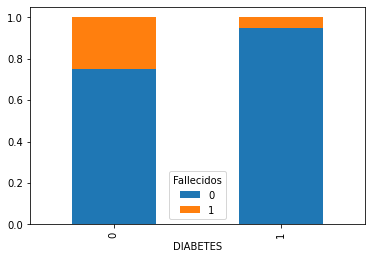

In [ ]:
diabetes = pd.crosstab(data.DIABETES, data.Fallecidos)
print(diabetes)
diabetes.div(diabetes.sum(1).astype(float), axis=0).plot.bar(stacked="True")


Hipertensión 

---



Fallecidos          0       1
HIPERTENSION                 
0              417905  124475
1             3048649  157784


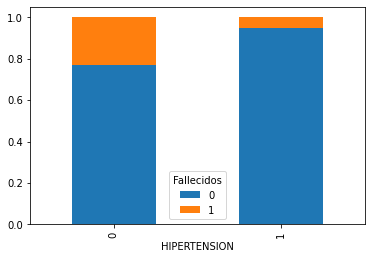

In [ ]:
hipertension = pd.crosstab(data.HIPERTENSION, data.Fallecidos)
print(hipertension)
hipertension.div(hipertension.sum(1).astype(float), axis=0).plot.bar(stacked="True")

Obesidad 

---



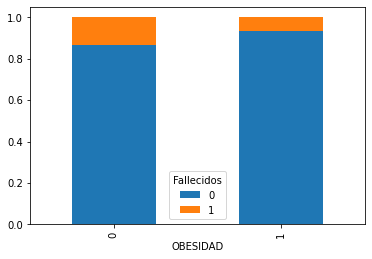

In [ ]:
obesidad = pd.crosstab(data.OBESIDAD, data.Fallecidos)
obesidad.div(obesidad.sum(1).astype(float), axis=0).plot.bar(stacked="True")

Cardiovascular 

---



Fallecidos            0       1
CARDIOVASCULAR                 
0                 32831   13574
1               3433723  268685


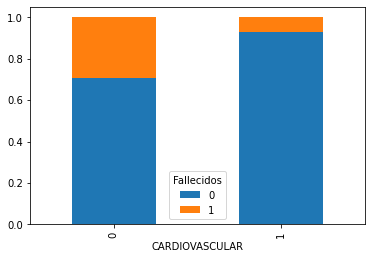

In [ ]:
cardio = pd.crosstab(data.CARDIOVASCULAR, data. Fallecidos)
print(cardio)
cardio.div(cardio.sum(1).astype(float), axis=0).plot.bar(stacked="True")

5. Regresion Logística 

---



In [ ]:
data["FECHA_DEF"] = data["FECHA_DEF"].replace("9999-99-99","2050-12-31")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import datetime
epoch = datetime.datetime(2020,2,28)
epoch_seconds = epoch.timestamp()
data["FECHA_DEF"] = pd.to_datetime(data["FECHA_DEF"], yearfirst=True).apply(lambda x: x.timestamp() - epoch_seconds)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,NEUMONIA,DIABETES,EPOC,ASMA,HIPERTENSION,OBESIDAD,CARDIOVASCULAR,OTRA_COM,FECHA_DEF,Fallecidos
0,1,1,1,1,1,1,1,1,-1.582848e+09,0
1,0,0,1,1,0,0,1,1,-1.582848e+09,1
8,1,0,1,1,1,1,1,1,-1.582848e+09,0
14,1,1,1,1,1,1,1,1,-1.582848e+09,0
15,1,1,1,1,1,1,1,1,-1.582848e+09,0


In [ ]:
#data["Fallecidos"] = data["Fallecidos"].apply(str)

In [ ]:
import seaborn as sb
#sb.pairplot(data, hue="Fallecidos", markers='o')

In [ ]:
for x in enfermedades:
    data[x] = data[x].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import seaborn as sb
#sb.pairplot(data, hue="Fallecidos", markers='o')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data_copy = data.copy()
target = data_copy["Fallecidos"]
data_copy.drop("Fallecidos", axis=1, inplace=True)
#data_copy.drop("FECHA_DEF", axis=1, inplace=True)
features = data_copy
#scaler = StandardScaler()
#features = scaler.fit_transform(features)
features = pd.DataFrame(features)

In [ ]:

features = pd.get_dummies(features)
features.head()

,FECHA_DEF,NEUMONIA_0,NEUMONIA_1,DIABETES_0,DIABETES_1,EPOC_0,EPOC_1,ASMA_0,ASMA_1,HIPERTENSION_0,HIPERTENSION_1,OBESIDAD_0,OBESIDAD_1,CARDIOVASCULAR_0,CARDIOVASCULAR_1,OTRA_COM_0,OTRA_COM_1
0,-1.582848e+09,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
1,-1.582848e+09,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1
8,-1.582848e+09,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1
14,-1.582848e+09,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
15,-1.582848e+09,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_holdout, y_train, y_holdout = train_test_split(features, target, test_size=0.3, random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
logreg = make_pipeline(MinMaxScaler(), LogisticRegression(C=1e9, penalty="none"))
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('logisticregression',
                 LogisticRegression(C=1000000000.0, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='none',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
print("Accuracy del clasificador en el conjunto de entrenamiento", round(logreg.score(x_train,y_train),4))
print("Accuracy del clasificador en el conjunto de validación", round(logreg.score(x_holdout,y_holdout),4))

Accuracy del clasificador en el conjunto de entrenamiento 1.0
Accuracy del clasificador en el conjunto de validación 1.0


In [ ]:
x_train.info()
print(logreg.named_steps['logisticregression'].coef_)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2624169 entries, 497709 to 3338255
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   FECHA_DEF         float64
 1   NEUMONIA_0        uint8  
 2   NEUMONIA_1        uint8  
 3   DIABETES_0        uint8  
 4   DIABETES_1        uint8  
 5   EPOC_0            uint8  
 6   EPOC_1            uint8  
 7   ASMA_0            uint8  
 8   ASMA_1            uint8  
 9   HIPERTENSION_0    uint8  
 10  HIPERTENSION_1    uint8  
 11  OBESIDAD_0        uint8  
 12  OBESIDAD_1        uint8  
 13  CARDIOVASCULAR_0  uint8  
 14  CARDIOVASCULAR_1  uint8  
 15  OTRA_COM_0        uint8  
 16  OTRA_COM_1        uint8  
dtypes: float64(1), uint8(16)
memory usage: 80.1 MB
[[-47.40643565   3.30341454   1.20991744   2.55419578   1.9591362
    2.02260732   2.49072466   1.47262567   3.04070631   2.66003793
    1.85329405   2.28371144   2.22962054   1.99251739   2.52081459
    2.1301596    2.38317238]]


6. Tabla de Coeficientes 

---



In [ ]:
import statsmodels.api as sm
x_train1 = x_train.copy()
X_train_with_constant = sm.add_constant(x_train1)
X_test_with_constant = sm.add_constant(x_holdout)
#x_train1.drop("FECHA_DEF", axis=1, inplace=True)
np.asarray(y_train)
logit_model=sm.Logit(y_train,X_train_with_constant)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         Current function value: 0.171440
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.359      
Dependent Variable: Fallecidos       AIC:              899774.9857
Date:               2021-10-21 22:28 BIC:              899787.7659
No. Observations:   2624169          Log-Likelihood:   -4.4989e+05
Df Model:           0                LL-Null:          -7.0141e+05
Df Residuals:       2624168          LLR p-value:      nan        
Converged:          0.0000           Scale:            1.0000     
No. Iterations:     35.0000                                       
-------------------------------------------------------------------
                  Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
-------------------------------------------------------------------
const             9.9901       nan     nan     nan      nan     nan
FECHA_DEF         0.0000    0.0000  0.0083  0.9934  -0.0000  0.0000
NEUMONIA_0        6.6128       nan     nan     nan      nan     nan
NEUMONIA_1     

7. Matriz de Confusión 

---



In [ ]:
from sklearn.metrics import confusion_matrix
y_predicted = logreg.predict(x_holdout)
matriz_confusion = confusion_matrix(y_holdout, y_predicted)
print(matriz_confusion)

[[1040144       0]
 [      0   84500]]


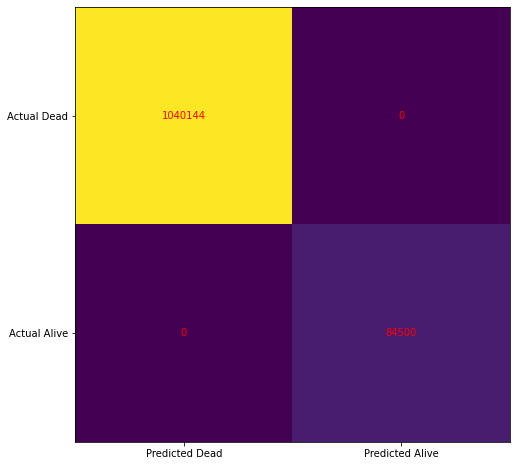

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(matriz_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Dead', 'Predicted Alive'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Dead', 'Actual Alive'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matriz_confusion[i, j], ha='center', va='center', color='red')
plt.show()

8. Curva Roc 

---



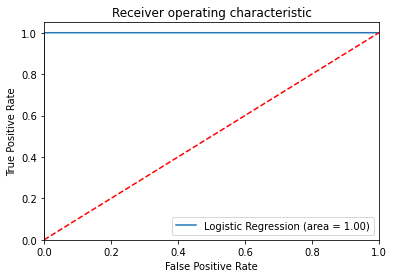

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_holdout, logreg.predict(x_holdout))
fpr, tpr, thresholds = roc_curve(y_holdout, logreg.predict_proba(x_holdout)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()